In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Loan_Data.csv")
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [3]:
fico_scores = df['fico_score'].values.reshape(-1, 1)
fico_scores

array([[605],
       [572],
       [602],
       ...,
       [596],
       [647],
       [757]], dtype=int64)

In [5]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['fico_bucket'] = kmeans.fit_predict(fico_scores)

In [6]:
centers = np.sort(kmeans.cluster_centers_.flatten())
rating_map = {center: i for i, center in enumerate(centers[::-1], 1)}
df['fico_rating'] = df['fico_bucket'].apply(lambda x: rating_map[kmeans.cluster_centers_[x][0]])

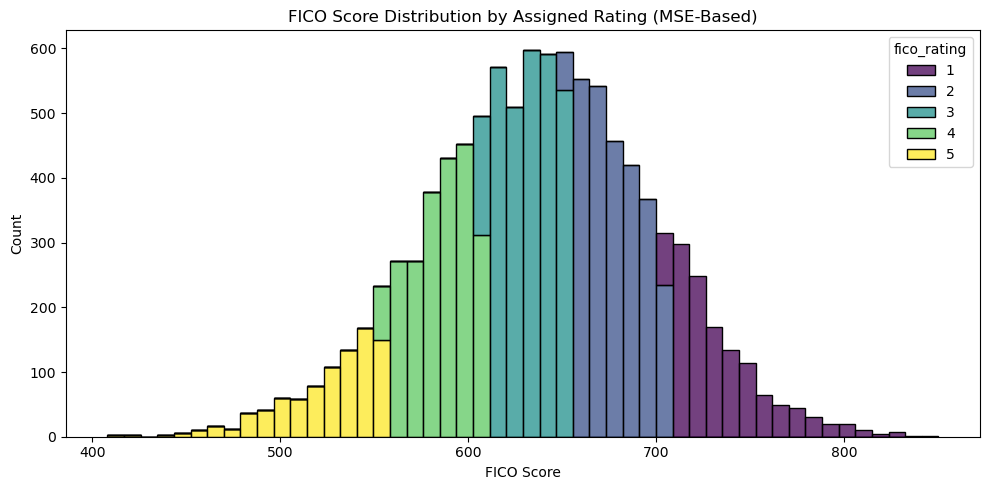

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='fico_score', hue='fico_rating', bins=50, palette='viridis', multiple='stack')
plt.title('FICO Score Distribution by Assigned Rating (MSE-Based)')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [8]:
default_rates = df.groupby('fico_rating')['default'].mean().reset_index()
default_rates.columns = ['fico_rating', 'default_rate']

C:\Users\LAKUM SAI CHARAN\AppData\Local\Temp\ipykernel_11764\4213682749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_rates, x='fico_rating', y='default_rate', palette='magma')


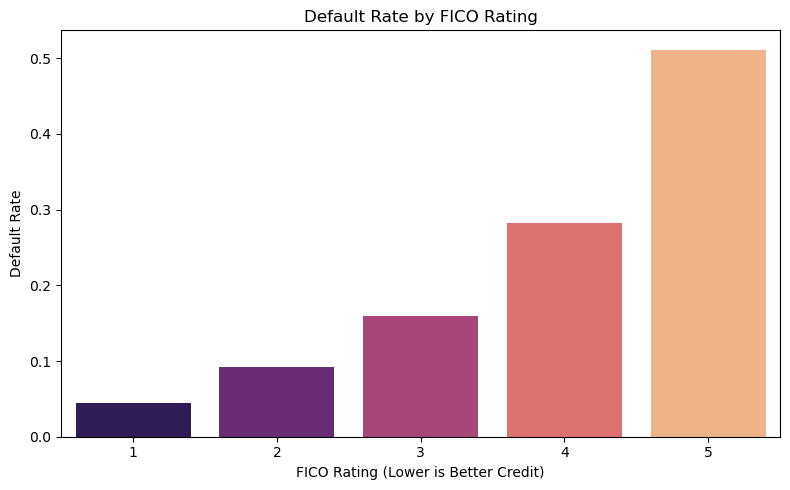

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(data=default_rates, x='fico_rating', y='default_rate', palette='magma')
plt.title('Default Rate by FICO Rating')
plt.xlabel('FICO Rating (Lower is Better Credit)')
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

In [10]:
df[['customer_id', 'fico_score', 'fico_rating', 'default']].to_csv("fico_ratings_output.csv", index=False)